Stock Prediction

In [5]:
%pip install "numpy<2"



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math 

In [2]:
df=pd.read_csv("DataSet2.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
temp=df.reset_index()["close"]
temp

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

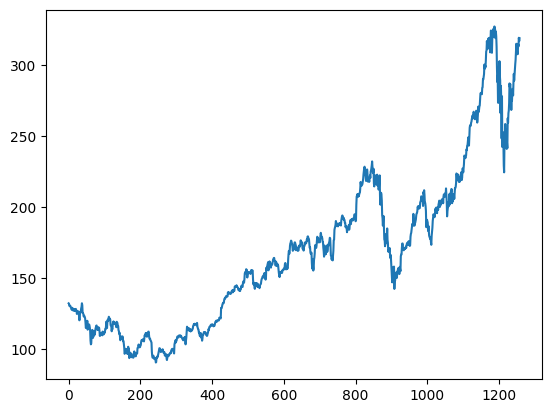

In [6]:
plt.plot(temp)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
temp=scaler.fit_transform(np.array(temp).reshape(-1,1))
temp

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [8]:
training_size=int(len(temp)*0.65)
test_size=len(temp)-training_size
train_data,test_data=temp[0:training_size,:],temp[training_size:len(temp),:1]
training_size,test_size
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [9]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0379 - val_loss: 0.0504
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 9.6267e-04 - val_loss: 0.0074
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 8.5900e-04 - val_loss: 0.0042
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 7.0212e-04 - val_loss: 0.0055
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.0080e-04 - val_loss: 0.0041
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 6.6282e-04 - val_loss: 0.0041
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 6.0928e-04 - val_loss: 0.0040
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 5.8938e-04 - val_loss: 0.0039
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 6.0155e-04 - val_loss: 0.0039
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 5.6153e-04 - val_loss: 0.0049
Epoch 12/100
12

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [18]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


141.5751697166278

In [20]:
math.sqrt(mean_squared_error(ytest,test_predict))

236.6213941778463

In [21]:

look_back=100
trainPredictPlot = np.empty_like(temp)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [22]:
testPredictPlot = np.empty_like(temp)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(temp)-1, :] = test_predict

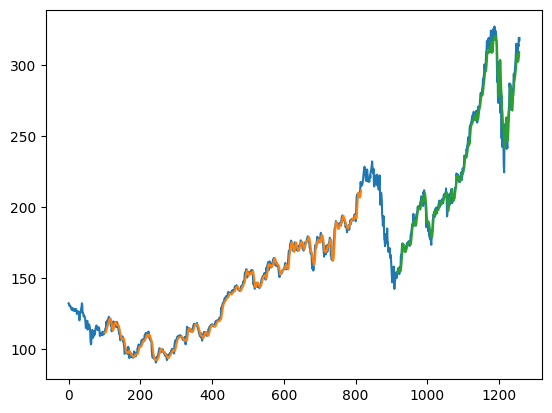

In [23]:

plt.plot(scaler.inverse_transform(temp))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
len(test_data)

441

In [25]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [31]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

lst_output

[0.94110626]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

[[0.9411062598228455],
 [0.9367057681083679],
 [0.9265275001525879],
 [0.9147820472717285],
 [0.9034667611122131],
 [0.8934730291366577],
 [0.8852614760398865],
 [0.8790608048439026],
 [0.8749001026153564],
 [0.87263023853302],
 [0.8719627857208252],
 [0.8725212812423706],
 [0.8738926649093628],
 [0.8756721019744873],
 [0.8774994611740112],
 [0.8790833950042725],
 [0.8802171945571899],
 [0.8807823061943054],
 [0.8807445168495178],
 [0.8801407217979431],
 [0.8790619969367981],
 [0.8776349425315857],
 [0.8760006427764893],
 [0.8742979764938354],
 [0.8726485371589661],
 [0.8711487054824829],
 [0.8698623776435852],
 [0.8688215017318726],
 [0.8680278658866882],
 [0.867459237575531]]

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
len(temp)

1258

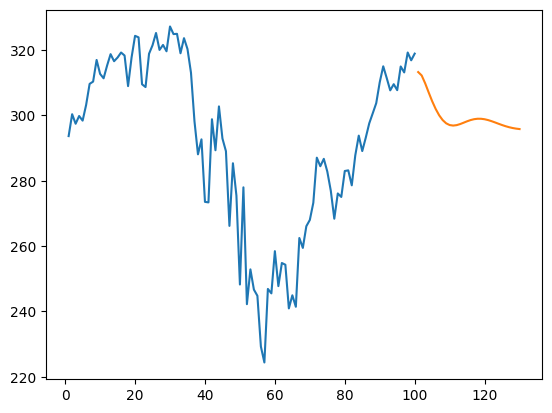

In [34]:
plt.plot(day_new,scaler.inverse_transform(temp[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

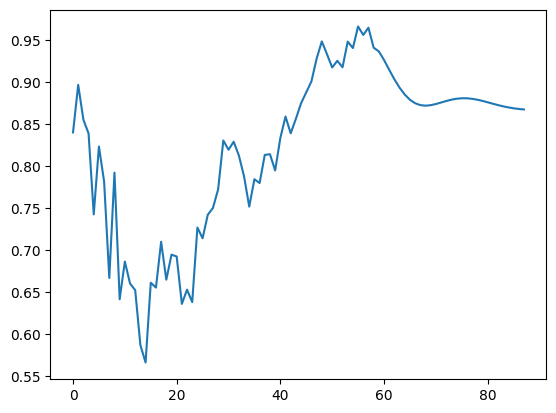

In [35]:
new_data=temp.tolist()
new_data.extend(lst_output)
plt.plot(new_data[1200:])

In [36]:
new_data=scaler.inverse_transform(new_data).tolist()

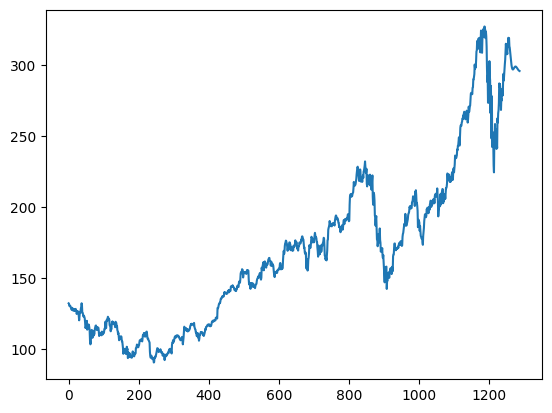

In [37]:

plt.plot(new_data)